In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("/content/gdrive/My Drive/covid19-analysis/covid19_final_cleaned.csv")

In [6]:
df.head()

,date,total-cases,cases,discharged,death,icu,pui,close-contact,tabligh,surveillance,hadr,import,perlis,kedah,pulau-pinang,perak,selangor,negeri-sembilan,melaka,johor,pahang,terengganu,kelantan,sabah,sarawak,wp-kuala-lumpur,wp-putrajaya,wp-labuan
0,24/1/2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25/1/2020,3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26/1/2020,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27/1/2020,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28/1/2020,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.columns

Index(['date', 'total-cases', 'cases', 'discharged', 'death', 'icu', 'pui',
       'close-contact', 'tabligh', 'surveillance', 'hadr', 'import', 'perlis',
       'kedah', 'pulau-pinang', 'perak', 'selangor', 'negeri-sembilan',
       'melaka', 'johor', 'pahang', 'terengganu', 'kelantan', 'sabah',
       'sarawak', 'wp-kuala-lumpur', 'wp-putrajaya', 'wp-labuan'],
      dtype='object')

# Data summary

In [8]:
df.describe()

,total-cases,cases,discharged,death,icu,pui,close-contact,tabligh,surveillance,hadr,import,perlis,kedah,pulau-pinang,perak,selangor,negeri-sembilan,melaka,johor,pahang,terengganu,kelantan,sabah,sarawak,wp-kuala-lumpur,wp-putrajaya,wp-labuan
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,3082.076336,60.129771,49.389313,0.877863,0.045802,28.656489,0.000000,25.748092,1.709924,0.000000,4.015267,0.137405,0.732824,0.923664,1.954198,14.702290,6.610687,1.778626,5.160305,2.755725,0.847328,1.190840,2.656489,4.213740,15.603053,0.740458,0.122137
std,2975.162585,63.720954,55.247078,1.462468,4.466736,152.747090,112.208117,94.415395,3.235592,9.057084,24.570146,0.665217,2.627735,2.265522,4.683625,20.116084,13.012167,4.336411,9.027153,4.981646,2.361464,2.984871,5.467064,6.562138,23.204336,1.812723,0.555018
min,0.000000,0.000000,0.000000,0.000000,-19.000000,-937.000000,-1238.000000,0.000000,0.000000,-74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,22.000000,2.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2470.000000,39.000000,33.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000
75%,6036.500000,109.500000,88.000000,1.000000,0.000000,45.000000,0.000000,22.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000,9.000000,2.000000,6.500000,3.000000,0.000000,0.000000,2.000000,7.000000,23.500000,1.000000,0.000000
max,7877.000000,235.000000,236.000000,7.000000,21.000000,1337.000000,172.000000,972.000000,20.000000,72.000000,274.000000,6.000000,26.000000,13.000000,30.000000,87.000000,72.000000,37.000000,43.000000,27.000000,18.000000,15.000000,31.000000,32.000000,177.000000,13.000000,5.000000


# Data Visualization

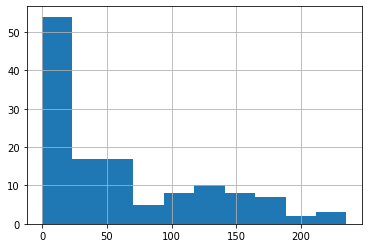

In [9]:
df.cases.hist()

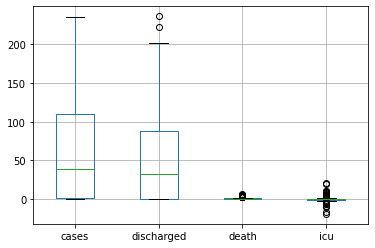

In [10]:
df.boxplot(column = ['cases', 'discharged', 'death', 'icu'])

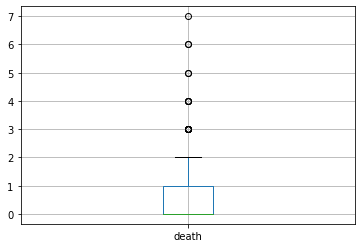

In [11]:
df.boxplot(column = ['death'])

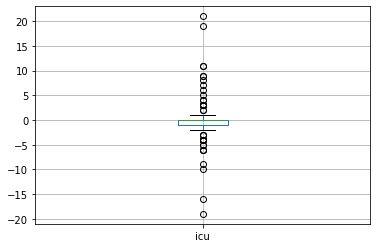

In [12]:
df.boxplot(column = ['icu'])

# Correlation
when near to 1 means highly correlate and -ve means inversely proportional. 
e.g. Number of cases in Selangor highly correlate with number of cases by 0.77. This mean Selangor give high contribute to the number of cases with directly proportional

In [0]:
#display all column
pd.options.display.max_columns
pd.set_option('display.max_columns', None)

In [73]:
corr_desired

,total-cases,cases,discharged,death,icu,pui,close-contact,tabligh,surveillance,hadr,import
total-cases,1.000000,0.294042,0.669092,0.145513,-0.203058,0.068952,-0.051032,0.093037,0.178904,-8.261446e-03,0.194897
cases,0.294042,1.000000,0.483904,0.683805,0.119597,0.239845,0.042494,0.193934,0.510281,-1.327533e-02,0.075127
discharged,0.669092,0.483904,1.000000,0.423495,-0.206365,0.337295,-0.249223,0.017151,0.280862,-7.108480e-02,0.125329
death,0.145513,0.683805,0.423495,1.000000,0.031479,0.171985,-0.028032,0.214368,0.410237,0.000000e+00,-0.064812
icu,-0.203058,0.119597,-0.206365,0.031479,1.000000,0.011016,0.029606,0.007597,0.045103,1.391839e-01,-0.136683
pui,0.068952,0.239845,0.337295,0.171985,0.011016,1.000000,-0.722810,-0.550036,0.002427,3.669773e-02,-0.059885
close-contact,-0.051032,0.042494,-0.249223,-0.028032,0.029606,-0.722810,1.000000,0.022709,0.149117,1.211055e-04,0.000000
tabligh,0.093037,0.193934,0.017151,0.214368,0.007597,-0.550036,0.022709,1.000000,0.112768,-2.351424e-02,0.010304
surveillance,0.178904,0.510281,0.280862,0.410237,0.045103,0.002427,0.149117,0.112768,1.000000,-1.191709e-01,0.239343
hadr,-0.008261,-0.013275,-0.071085,0.000000,0.139184,0.036698,0.000121,-0.023514,-0.119171,1.000000e+00,-0.700879


In [71]:
corr = df.corr()

corr_desired = corr.drop(columns = ['perlis','kedah', 'pulau-pinang', 'perak', 'selangor', 'negeri-sembilan',
                                    'melaka', 'johor', 'pahang', 'terengganu', 'kelantan', 'sabah',
                                    'sarawak', 'wp-kuala-lumpur', 'wp-putrajaya', 'wp-labuan'])
print(corr_desired)

                 total-cases     cases  discharged     death       icu  \
total-cases         1.000000  0.294042    0.669092  0.145513 -0.203058   
cases               0.294042  1.000000    0.483904  0.683805  0.119597   
discharged          0.669092  0.483904    1.000000  0.423495 -0.206365   
death               0.145513  0.683805    0.423495  1.000000  0.031479   
icu                -0.203058  0.119597   -0.206365  0.031479  1.000000   
pui                 0.068952  0.239845    0.337295  0.171985  0.011016   
close-contact      -0.051032  0.042494   -0.249223 -0.028032  0.029606   
tabligh             0.093037  0.193934    0.017151  0.214368  0.007597   
surveillance        0.178904  0.510281    0.280862  0.410237  0.045103   
hadr               -0.008261 -0.013275   -0.071085  0.000000  0.139184   
import              0.194897  0.075127    0.125329 -0.064812 -0.136683   
perlis             -0.074374  0.245835   -0.019676  0.072732 -0.051322   
kedah              -0.132808  0.338191

The correlation can be visualize in heat map

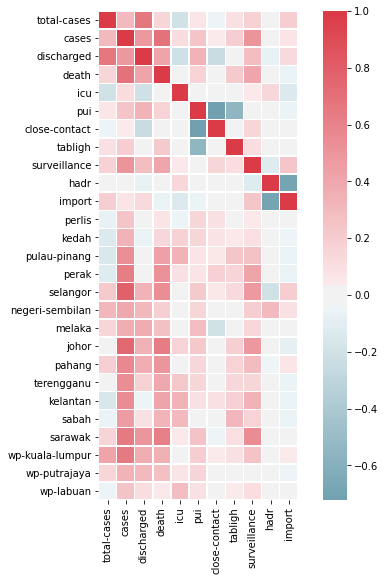

In [74]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(9,9)) #size of heatmap
sns.heatmap(corr_desired, center=0, cmap=cmap, square=True, linewidths=.5, cbar={"shrink":.5}, ax=ax)